<a href="https://colab.research.google.com/github/FelixBra/Brain-MRI-Images-for-Brain-Tumor-Detection/blob/master/Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Activation,Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
import keras
from keras.applications import VGG16

#print(os.listdir())

Using TensorFlow backend.


In [38]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1/255,  #just deactivated for def plots()
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.15)
        
batch_size = 10

train_generator = datagen.flow_from_directory(
        "/gdrive/My Drive/Brain MRI Images for Brain Tumor Detection/data/",  
        target_size=(224, 224),
        batch_size=batch_size, class_mode='categorical',
        classes=["no", "yes"],subset="training")

validation_generator = datagen.flow_from_directory("/gdrive/My Drive/Brain MRI Images for Brain Tumor Detection/data/",target_size=(224, 224),class_mode='categorical',
                                                     classes=["no", "yes"], batch_size=batch_size, subset="validation")

Found 216 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [39]:
vgg16_model = VGG16(weights='imagenet', 
                  include_top=True,input_shape=(224, 224, 3)
                  )
vgg16_model.layers.pop()
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [40]:
model = Sequential()

for i in vgg16_model.layers:
  model.add(i)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
for layers in model.layers:
  layers.trainable = False    

In [42]:
model.summary()
model.add(Dense(2, activation='softmax'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
model.compile(Adam(lr=0.002), loss ='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history=model.fit_generator(train_generator,steps_per_epoch=500,epochs=10,validation_data=validation_generator,
                            validation_steps=50,verbose = 1) 

Epoch 1/10
500/500 [==============================] - 80s 160ms/step - loss: 0.6089 - acc: 0.7218 - val_loss: 0.4204 - val_acc: 0.8017
Epoch 2/10
500/500 [==============================] - 80s 161ms/step - loss: 0.4938 - acc: 0.7912 - val_loss: 0.3822 - val_acc: 0.8221
Epoch 3/10
500/500 [==============================] - 77s 155ms/step - loss: 0.4076 - acc: 0.8231 - val_loss: 0.6706 - val_acc: 0.7310
Epoch 5/10
500/500 [==============================] - 77s 155ms/step - loss: 0.3559 - acc: 0.8411 - val_loss: 0.3113 - val_acc: 0.8664
Epoch 6/10
500/500 [==============================] - 79s 159ms/step - loss: 0.3918 - acc: 0.8333 - val_loss: 0.2899 - val_acc: 0.8612
Epoch 7/10
500/500 [==============================] - 77s 154ms/step - loss: 0.3949 - acc: 0.8337 - val_loss: 0.5014 - val_acc: 0.7953
Epoch 8/10
500/500 [==============================] - 77s 154ms/step - loss: 0.4089 - acc: 0.8373 - val_loss: 0.5274 - val_acc: 0.7831
Epoch 9/10
500/500 [==============================] - 7

In [0]:
def plot_training_curves(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Losses')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Accuracies')
    plt.legend()
    plt.figure()
    
    plt.show()

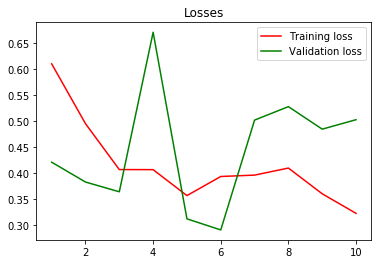

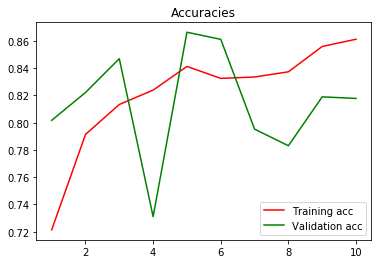

<Figure size 432x288 with 0 Axes>

In [47]:
plot_training_curves(history)